# ECON 616 Macroeconometrics - HW 5

Professor Ed Herbst <br> Steven Zheng <br> sz293@georgetown.edu <br> December 4, 2017

## Number 1

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')

In [221]:
data = pd.read_csv('factor_data.csv')
data = data.loc[~(data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']]==0).all(axis=1)]
data = data.dropna().reset_index(drop=True)
data.tail()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
262,2012,1,0.000539,0.000000,0.000484,-0.001774,-0.004032
263,2012,2,-0.003871,0.000000,-0.011613,-0.019355,-0.027097
264,2012,3,0.000000,0.000000,0.003065,0.009193,0.012258
265,2012,4,0.000000,0.000000,0.001935,0.005806,0.007742
266,2012,6,0.002754,0.003667,0.007333,0.007333,0.007333


In [377]:
data.describe()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2000.715356,6.434457,-0.015501,-0.013600,-0.012401,-0.011723,-0.011910
std,6.446532,3.471475,0.058753,0.048675,0.049646,0.051313,0.050781
min,1990.000000,1.000000,-0.422587,-0.290322,-0.255366,-0.275290,-0.251984
25%,1995.000000,3.000000,-0.015782,-0.010984,-0.018226,-0.022903,-0.028387
50%,2001.000000,6.000000,0.000000,-0.001129,-0.001500,-0.001000,-0.003237
75%,2006.000000,9.000000,0.004511,0.003688,0.008479,0.009113,0.009540
max,2012.000000,12.000000,0.145830,0.092193,0.133929,0.161129,0.213387


In [223]:
data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']].corr()

,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
mp1_tc,1.000000,0.812173,0.737529,0.643878,0.540106
ff4_tc,0.812173,1.000000,0.810007,0.743412,0.650943
ed2_tc,0.737529,0.810007,1.000000,0.964222,0.898653
ed3_tc,0.643878,0.743412,0.964222,1.000000,0.965513
ed4_tc,0.540106,0.650943,0.898653,0.965513,1.000000


## Number 2

#### Center and normalize each column so that each column has length 1.

In [224]:
X = data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']]
X = X - X.mean()

X[['mp1_tc']] = X[['mp1_tc']] / np.linalg.norm(X['mp1_tc'])
X[['ff4_tc']] = X[['ff4_tc']] / np.linalg.norm(X['ff4_tc'])
X[['ed2_tc']] = X[['ed2_tc']] / np.linalg.norm(X['ed2_tc'])
X[['ed3_tc']] = X[['ed3_tc']] / np.linalg.norm(X['ed3_tc'])
X[['ed4_tc']] = X[['ed4_tc']] / np.linalg.norm(X['ed4_tc'])

pca_data.tail()

,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
390,0.016739,0.017132,0.015913,0.011887,0.009511
391,0.012137,0.017132,0.000973,-0.009120,-0.018337
392,0.016176,0.017132,0.019100,0.024993,0.029181
393,0.016176,0.017132,0.017706,0.020945,0.023728
395,0.019050,0.021751,0.024372,0.022770,0.023234


Now the matrix $X'X$ is a correlation matrix.

In [225]:
XTX = np.dot(X.T,X)
print(XTX)

[[ 1.          0.81217265  0.73752878  0.64387773  0.54010602]
 [ 0.81217265  1.          0.81000676  0.74341234  0.65094347]
 [ 0.73752878  0.81000676  1.          0.96422238  0.89865292]
 [ 0.64387773  0.74341234  0.96422238  1.          0.96551282]
 [ 0.54010602  0.65094347  0.89865292  0.96551282  1.        ]]


In [226]:
eigenvalues, eigenvectors = np.linalg.eigh(XTX)
eigenvalues = np.flip(eigenvalues,0) #Python gave them in smallest to largest so we flip them
eigenvectors = np.flip(eigenvectors,1)

print('The eigenvalues are\n %s\nand the eigenvectors are \n %s' % (eigenvalues,eigenvectors))

The eigenvalues are
 [ 4.12186179  0.63248026  0.17428711  0.05879128  0.01257956]
and the eigenvectors are 
 [[-0.40066132 -0.65349036 -0.61717299 -0.17629405 -0.0209464 ]
 [-0.4339722  -0.42992623  0.77831614 -0.14508527  0.00241074]
 [-0.48084705  0.13260004 -0.05671399  0.74831789  0.43359797]
 [-0.47185891  0.33973923 -0.05442712  0.09930073 -0.80566958]
 [-0.44415528  0.50508243 -0.08451447 -0.61484174  0.40304437]]


In [240]:
eigenvalues_percent 

array([ 82.43723586,  12.64960525,   3.48574213,   1.17582565,   0.2515911 ])

 #### The first three principal components explain 82.44% + 12.65% + 3.49% = 98.58% of the variation and follow the levels, steepness and curvature of Litterman and Scheinkman (1991).

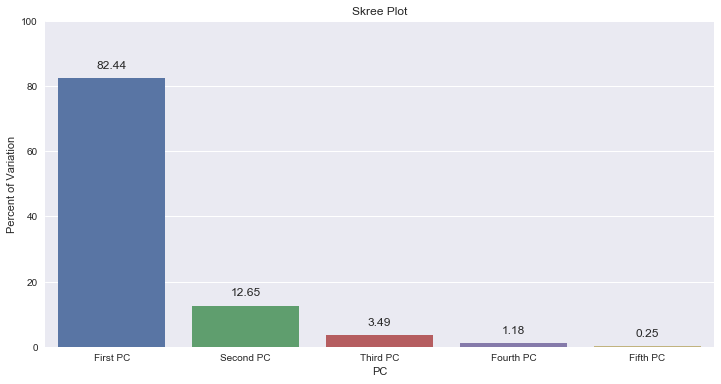

In [227]:
eigenvalues_percent = eigenvalues/sum(eigenvalues)*100

plt.figure(figsize=(12,6))

PC_labels = ['First PC','Second PC','Third PC','Fourth PC','Fifth PC']
ax = sns.barplot(PC_labels,eigenvalues_percent)

for i in range(len(eigenvalues_percent)):
    variation = eigenvalues_percent[i]
    height = ax.patches[i].get_height()
    ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2.,
            height+3, 
            '{:1.2f}'.format(eigenvalues_percent[i]),
            ha='center')

plt.xlabel('PC')
plt.ylabel('Percent of Variation')
plt.ylim(0,100)
plt.title('Skree Plot')
plt.show()

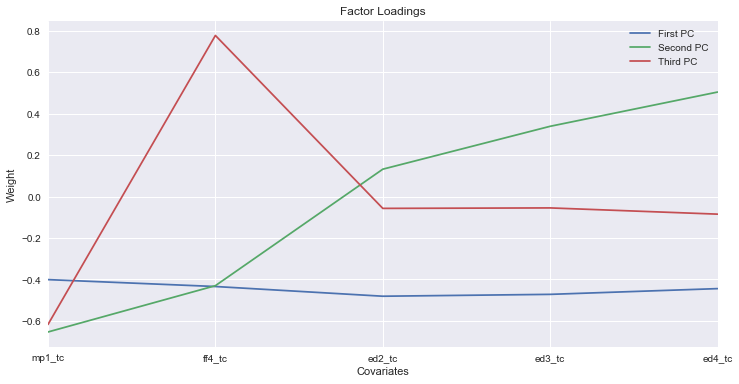

In [379]:
factor_loadings = pd.DataFrame(eigenvectors)
factor_loadings[0] = -1*factor_loadings[0]

ax = factor_loadings[[0,1,2]].plot(figsize=(12,6))
ax.set_xticks(range(len(X.columns)))
ax.set_xticklabels(X.columns)

lines, labels = ax.get_legend_handles_labels()
labels = ['First PC', 'Second PC', 'Third PC']
ax.legend(lines, labels, loc='best')

plt.title('Factor Loadings')
plt.xlabel('Covariates')
plt.ylabel('Weight')
plt.show()

#### And then plotting the first three principal components over time.

In [316]:
projections = pd.DataFrame(np.dot(X,eigenvectors[:,0]))
projections.columns = ['PC 1']
projections['PC 2'] = pd.DataFrame(np.dot(X,eigenvectors[:,1]))
projections['PC 3'] = pd.DataFrame(np.dot(X,eigenvectors[:,2]))
projections.tail()

,PC 1,PC 2,PC 3
262,0.031627,-0.007352,0.000650
263,0.000318,-0.027528,0.007835
264,0.047854,0.007826,-0.001559
265,0.042852,0.003512,-0.000799
266,0.049855,0.000903,0.000586


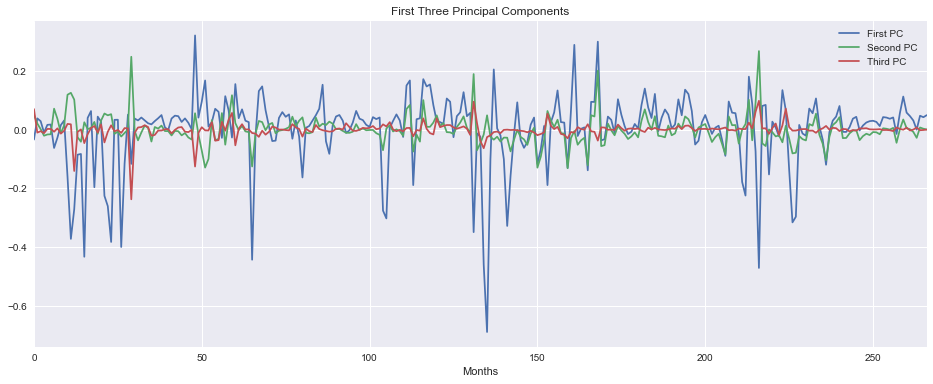

In [378]:
ax = projections.plot(figsize=(16,6))
lines, labels = ax.get_legend_handles_labels()
labels = ['First PC', 'Second PC', 'Third PC']
ax.legend(lines, labels, loc='best')
plt.title('First Three Principal Components')
plt.xlabel('Months')
plt.show()

## Number 3